In [69]:
import os
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

import scipy.io as sio
import xarray as xr

from mapper_functions import plot_global_tight

In [70]:
expt_1_name = 'DAv7_M36_ASCAT_type_13_test_catdef'
expt_2_name = 'DAv7_M36_ASCAT_type_2_fp_precip'

comp_dir = 'catchdef_compare'

ex1_label = 'ASC_FP_rel'
ex2_label = 'ASC_FP'

start_date = datetime(2015, 4, 1)
end_date = datetime(2015, 4, 20)

start_date_str = start_date.strftime('%Y%m%d')
end_date_str = end_date.strftime('%Y%m%d')

# f'{expt_name}_{start_date_str}_{end_date_str}_increment_stats.npz'

In [71]:
# Load the .npz file
data = np.load(f'../test_data/{comp_dir}/{expt_1_name}_{start_date_str}_{end_date_str}_OmF_ts.npz')

# Get the data from the .npz file
ex1_dates_list = data['dates_list']
ex1_obs_obs_mean_list = data['obs_obs_mean_list']
ex1_obs_fcst_mean_list = data['obs_fcst_mean_list']
ex1_obs_ana_mean_list = data['obs_ana_mean_list']
ex1_omf_mean_list = data['omf_mean_list']
ex1_oma_mean_list = data['oma_mean_list']
ex1_omf_max_list = data['omf_max_list']
ex1_omf_std_list = data['omf_std_list']
ex1_oma_std_list = data['oma_std_list']

# Load the .npz file
data = np.load(f'../test_data/{comp_dir}/{expt_2_name}_{start_date_str}_{end_date_str}_OmF_ts.npz')

# Get the data from the .npz file
ex2_dates_list = data['dates_list']
ex2_obs_obs_mean_list = data['obs_obs_mean_list']
ex2_obs_fcst_mean_list = data['obs_fcst_mean_list']
ex2_obs_ana_mean_list = data['obs_ana_mean_list']
ex2_omf_mean_list = data['omf_mean_list']
ex2_oma_mean_list = data['oma_mean_list']
ex2_omf_max_list = data['omf_max_list']
ex2_omf_std_list = data['omf_std_list']
ex2_oma_std_list = data['oma_std_list']

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (5).

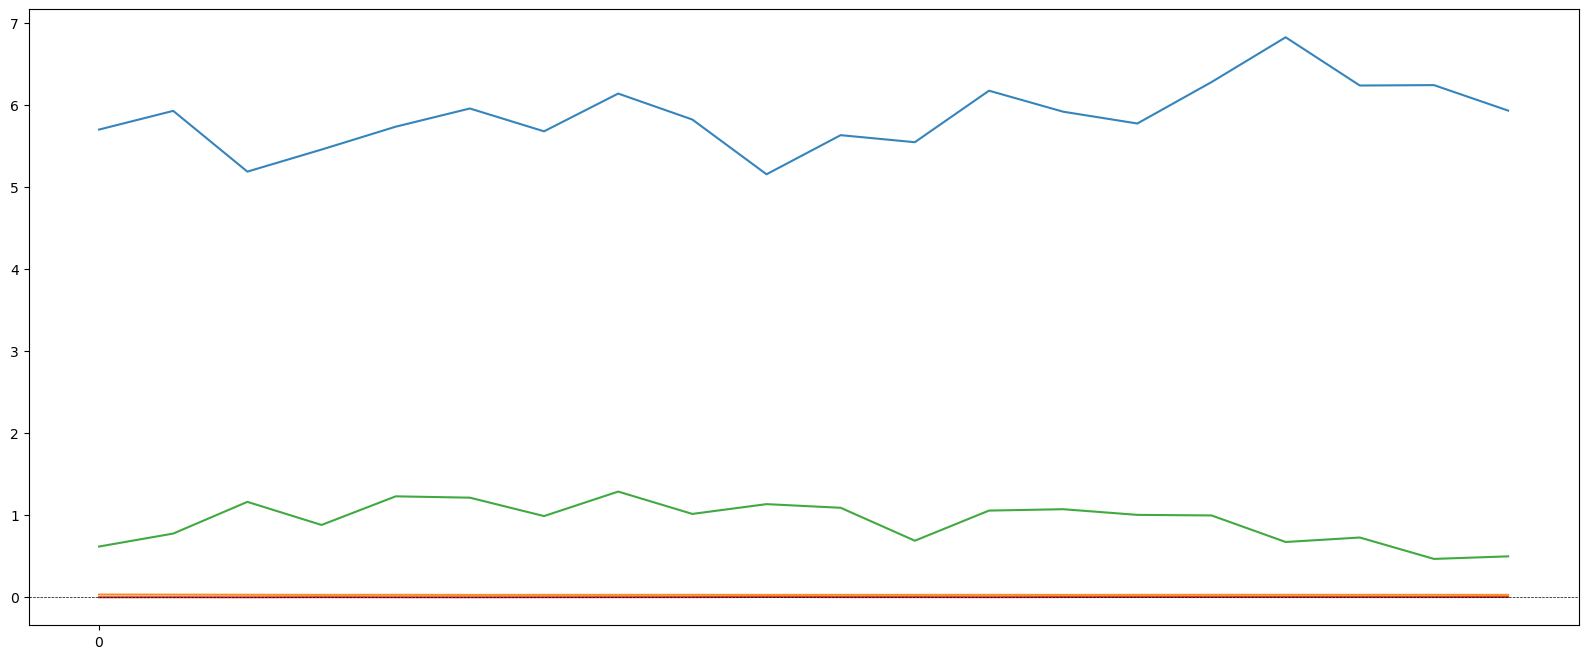

In [72]:
# Create a bar plot of the mean values

plt.figure(figsize=(20,8))
bar_width = 1.5
opacity = 0.9
index = np.arange(len(ex1_dates_list))

# Create a line plot
plt.plot(index, ex1_omf_std_list, alpha=opacity, label=f'{ex1_label} OmF StdDev ({np.nanmean(ex1_omf_std_list):.3f})')
plt.plot(index, ex2_omf_std_list, alpha=opacity, label=f'{ex2_label} OmF StdDev ({np.nanmean(ex2_omf_std_list):.3f})')
plt.plot(index, ex1_omf_mean_list, alpha=opacity, label=f'{ex1_label} OmF mean ({np.nanmean(ex1_omf_mean_list):.4f})')
plt.plot(index, ex2_omf_mean_list, alpha=opacity, label=f'{ex2_label} OmF mean ({np.nanmean(ex2_omf_mean_list):.4f})')

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in ex1_dates_list if date.endswith('0401')]
xtick_indices = np.where(np.isin(ex1_dates_list, xticks))[0]
xticks2 = ['1 April 2015', '1 April 2016', '1 April 2017', '1 April 2018','1 April 2019'] #, '1 April 2020']
plt.xticks(xtick_indices, xticks2, fontsize=12)
plt.yticks(fontsize=12)

# Adjust x-axis limits
plt.xlim(-5, len(ex1_dates_list) + 5)

# Add a y label
plt.ylabel('SFDS (Wetness fraction)', weight='bold', fontsize=14)

plt.legend(fontsize=12)

# Add a title
plt.title('Global daily OmF and OmA statistics for ASCAT SFDS observations', weight='bold', fontsize=18)

# Save the figure as a PNG file
plt.savefig('ncd_OmF_mean_ts.png', bbox_inches='tight')

plt.show()

In [ ]:
# Load the calculated values from the file
data = np.load(f'../test_data/ncd_compare/{expt_1_name}_{start_date_str}_{end_date_str}_obsfcstana_stats.npz', allow_pickle=True)

# list the variables in the file
print(data.files)

ex1_unique_tilenum = data['unique_tilenum']
ex1_num_unique_tilenum = len(ex1_unique_tilenum)
ex1_lon_tilenum = data['lon_tilenum']
ex1_lat_tilenum = data['lat_tilenum']
ex1_num_obs = data['num_obs']
ex1_std_obs_minus_fcst = data['std_obs_minus_fcst']
ex1_std_obs_minus_ana = data['std_obs_minus_ana']


obarray = np.empty([ex1_num_unique_tilenum, 3])
obarray.fill(np.nan)
obarray[:, 1] = ex1_lon_tilenum
obarray[:, 2] = ex1_lat_tilenum

obarray[:, 0] = ex1_num_obs    
plot_global_tight(obarray,False,f'{ex1_label}: Number of ASCAT Obs Assimilated','Total', 0, 6000, cmap='Greens')

obarray[:, 0] = ex1_std_obs_minus_fcst    
plot_global_tight(obarray,False,f'{ex1_label}: StdDev of OmF (SFDS)','(Wetness fraction)', 0, 0.2, cmap='Oranges')

FileNotFoundError: [Errno 2] No such file or directory: '../test_data/ncd_compare/DAv7_M36_ASCAT_type_13_test_catdef_20150401_20150420_obsfcstana_stats.npz'

['unique_tilenum', 'num_obs_smap', 'num_obs_ascat', 'mean_obs_smap', 'mean_obs_ascat', 'mean_fcst_smap', 'mean_fcst_ascat', 'mean_ana_smap', 'mean_ana_ascat', 'mean_obs_minus_fcst_smap', 'mean_obs_minus_fcst_ascat', 'mean_obs_minus_ana_smap', 'mean_obs_minus_ana_ascat', 'std_obs_minus_fcst_smap', 'std_obs_minus_fcst_ascat', 'std_obs_minus_ana_smap', 'std_obs_minus_ana_ascat', 'lon_tilenum', 'lat_tilenum']


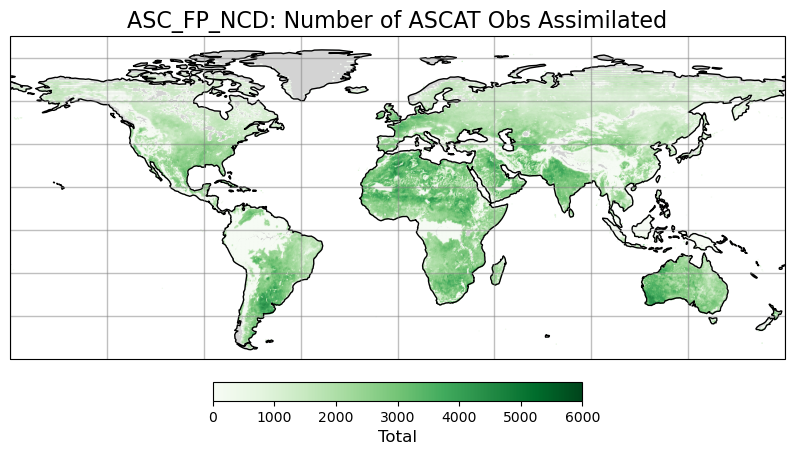

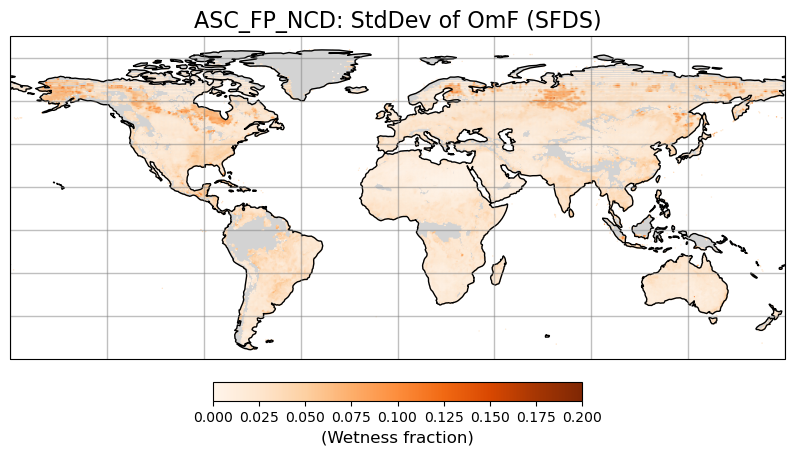

In [ ]:
# Load the calculated values from the file
data = np.load(f'../test_data/ncd_compare/{expt_2_name}_{start_date_str}_{end_date_str}_obsfcstana_stats.npz', allow_pickle=True)

# list the variables in the file
print(data.files)

ex2_unique_tilenum = data['unique_tilenum']
ex2_num_unique_tilenum = len(ex2_unique_tilenum)
ex2_lon_tilenum = data['lon_tilenum']
ex2_lat_tilenum = data['lat_tilenum']
ex2_num_obs = data['num_obs_ascat']
ex2_std_obs_minus_fcst = data['std_obs_minus_fcst_ascat']
ex2_std_obs_minus_ana = data['std_obs_minus_ana_ascat']


obarray = np.empty([ex2_num_unique_tilenum, 3])
obarray.fill(np.nan)
obarray[:, 1] = ex2_lon_tilenum
obarray[:, 2] = ex2_lat_tilenum

obarray[:, 0] = ex2_num_obs    
plot_global_tight(obarray,False,f'{ex2_label}: Number of ASCAT Obs Assimilated','Total', 0, 6000, cmap='Greens')

obarray[:, 0] = ex2_std_obs_minus_fcst    
plot_global_tight(obarray,False,f'{ex2_label}: StdDev of OmF (SFDS)','(Wetness fraction)', 0, 0.2, cmap='Oranges')

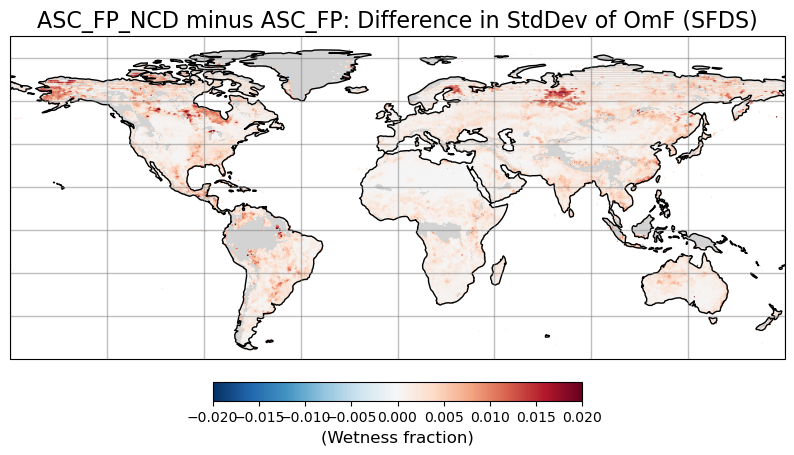

In [ ]:
# Find the corresponding values in unique_tilenum_fp and their indices
mask = np.isin(ex1_unique_tilenum, ex2_unique_tilenum)
ex1_corresponding_values = ex1_unique_tilenum[mask]
ex1_corresponding_indices = np.where(mask)[0]

# Find the corresponding values in unique_tilenum and their indices
ex2_corresponding_indices = np.where(np.isin(ex2_unique_tilenum, ex1_corresponding_values))[0]

# Subtract the values
std_obs_minus_fcst_diff = ex2_std_obs_minus_fcst[ex2_corresponding_indices] - ex1_std_obs_minus_fcst[ex1_corresponding_indices] 


obarray = np.empty([len(ex1_corresponding_indices), 3])
obarray.fill(np.nan)

obarray[:, 1] = ex1_lon_tilenum[ex1_corresponding_indices]
obarray[:, 2] = ex1_lat_tilenum[ex1_corresponding_indices]

obarray[:, 0] = std_obs_minus_fcst_diff
plot_global_tight(obarray,False,f'{ex2_label} minus {ex1_label}: Difference in StdDev of OmF (SFDS)','(Wetness fraction)', -0.02, 0.02, cmap='RdBu_r')

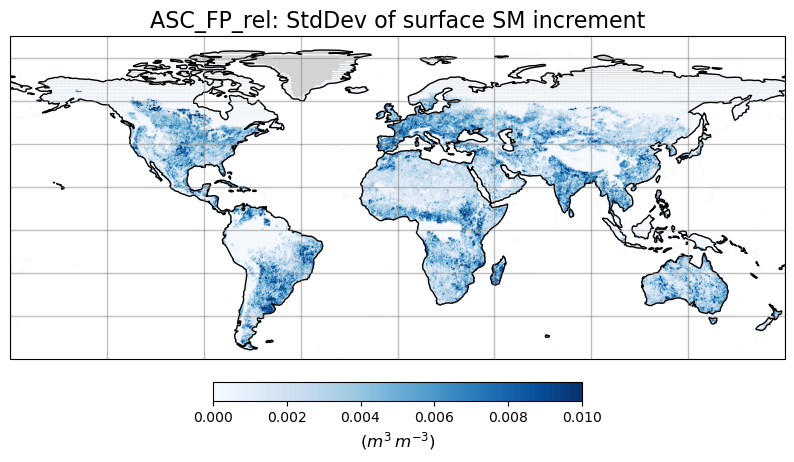

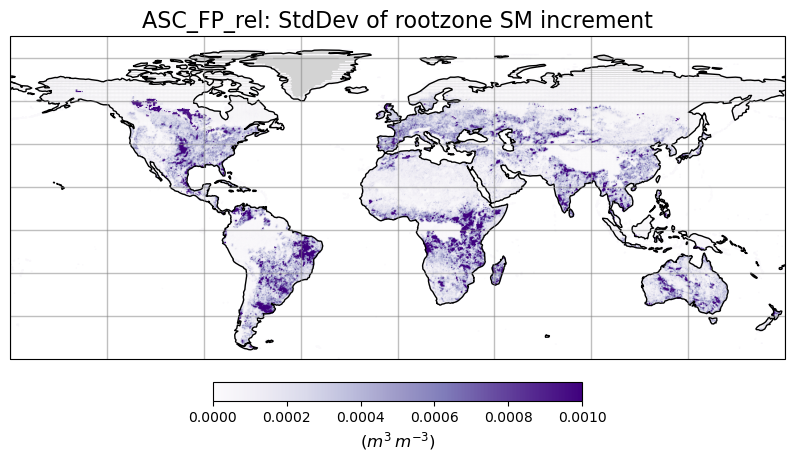

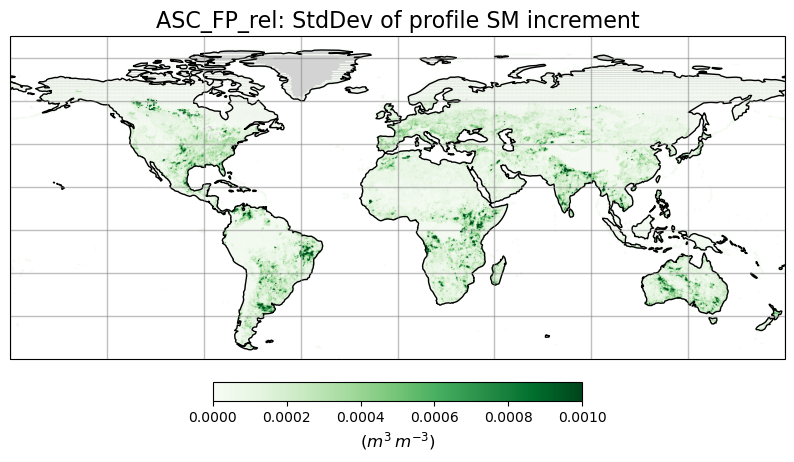

In [73]:
ds = xr.open_dataset('DAv7_M36.inst3_1d_lndfcstana_Nt.20150901.nc4')

lon = ds['lon']
lat = ds['lat']

n_tile = len(lat)

# Load the calculated values from the file
data = np.load(f'../test_data/{comp_dir}/{expt_1_name}_{start_date_str}_{end_date_str}_increment_stats.npz' , allow_pickle=True)

ex1_std_sfmc_increment = data['std_sfmc_increment']
ex1_std_rzmc_increment = data['std_rzmc_increment']
ex1_std_prmc_increment = data['std_prmc_increment']

obarray = np.empty([n_tile, 3])
obarray.fill(np.nan)
obarray[:, 1] = lon
obarray[:, 2] = lat
obarray[:, 0] = ex1_std_sfmc_increment
plot_global_tight(obarray,False,f'{ex1_label}: StdDev of surface SM increment','($m^3 \, m^{-3}$)', 0, 0.01, cmap='Blues')

obarray[:, 0] = ex1_std_rzmc_increment
plot_global_tight(obarray,False,f'{ex1_label}: StdDev of rootzone SM increment','($m^3 \, m^{-3}$)', 0, 0.001, cmap='Purples')

obarray[:, 0] = ex1_std_prmc_increment
plot_global_tight(obarray,False,f'{ex1_label}: StdDev of profile SM increment','($m^3 \, m^{-3}$)', 0, 0.001, cmap='Greens')

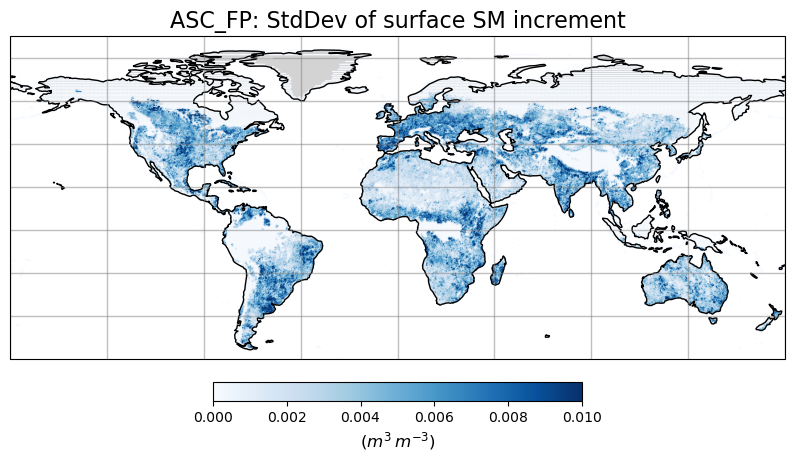

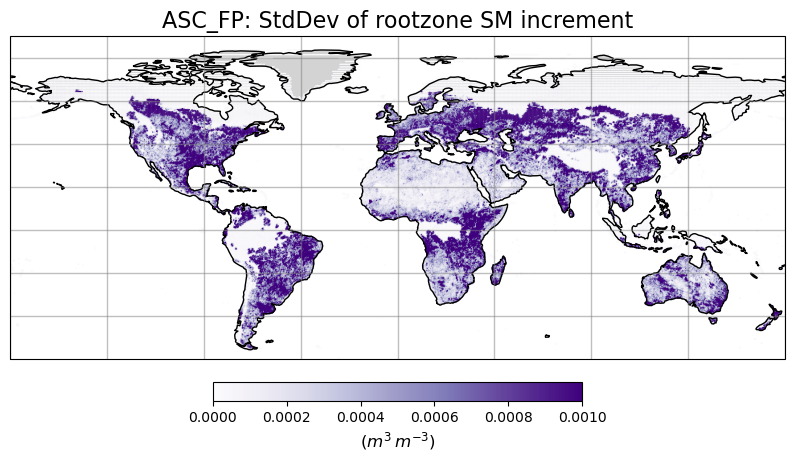

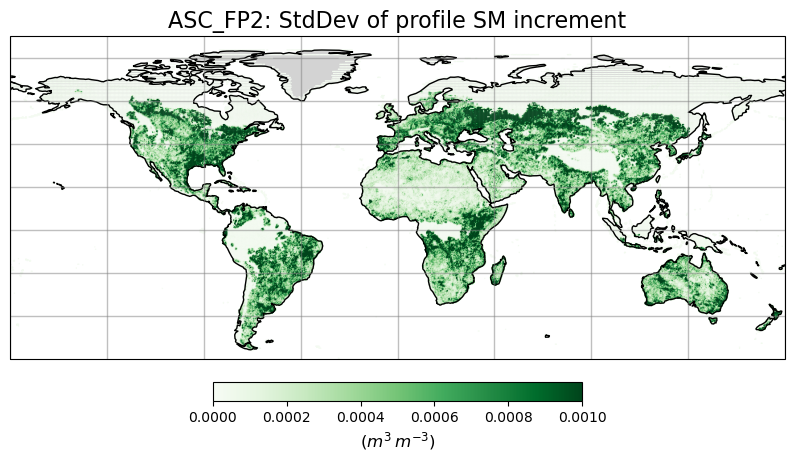

In [74]:
ds = xr.open_dataset('DAv7_M36.inst3_1d_lndfcstana_Nt.20150901.nc4')

lon = ds['lon']
lat = ds['lat']

n_tile = len(lat)

# Load the calculated values from the file
data = np.load(f'../test_data/{comp_dir}/{expt_2_name}_{start_date_str}_{end_date_str}_increment_stats.npz' , allow_pickle=True)

ex2_std_sfmc_increment = data['std_sfmc_increment']
ex2_std_rzmc_increment = data['std_rzmc_increment']
ex2_std_prmc_increment = data['std_prmc_increment']

obarray = np.empty([n_tile, 3])
obarray.fill(np.nan)
obarray[:, 1] = lon
obarray[:, 2] = lat
obarray[:, 0] = ex2_std_sfmc_increment
plot_global_tight(obarray,False,f'{ex2_label}: StdDev of surface SM increment','($m^3 \, m^{-3}$)', 0, 0.01, cmap='Blues')

obarray[:, 0] = ex2_std_rzmc_increment
plot_global_tight(obarray,False,f'{ex2_label}: StdDev of rootzone SM increment','($m^3 \, m^{-3}$)', 0, 0.001, cmap='Purples')

obarray[:, 0] = ex2_std_prmc_increment
plot_global_tight(obarray,False,f'{ex2_label}2: StdDev of profile SM increment','($m^3 \, m^{-3}$)', 0, 0.001, cmap='Greens')

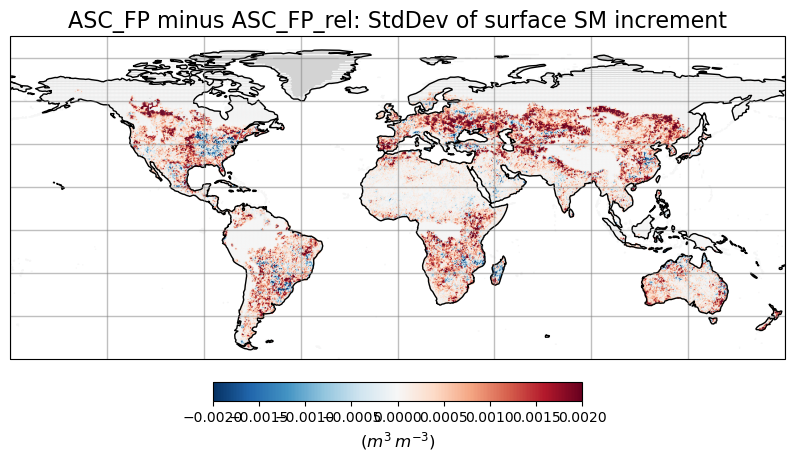

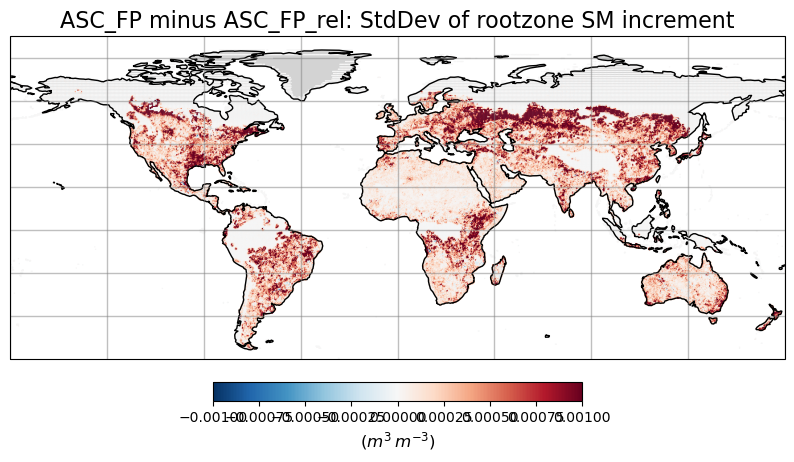

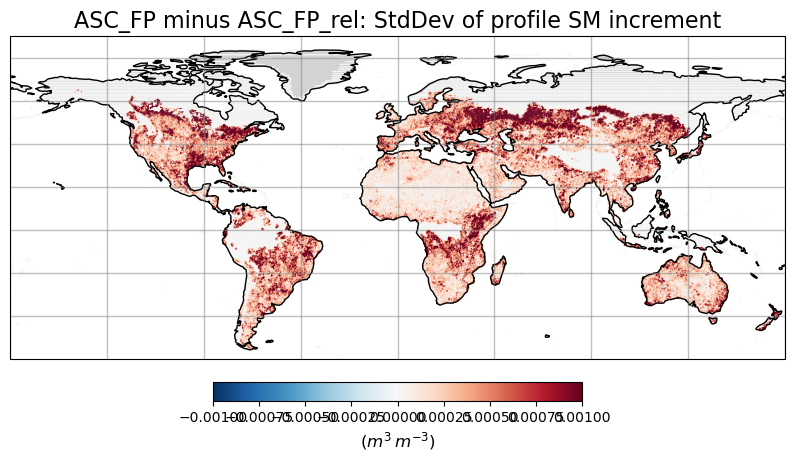

In [75]:
obarray = np.empty([n_tile, 3])
obarray.fill(np.nan)
obarray[:, 1] = lon
obarray[:, 2] = lat
obarray[:, 0] = ex2_std_sfmc_increment - ex1_std_sfmc_increment
plot_global_tight(obarray,False,f'{ex2_label} minus {ex1_label}: StdDev of surface SM increment','($m^3 \, m^{-3}$)', -0.002, 0.002, cmap='RdBu_r')

obarray[:, 0] = ex2_std_rzmc_increment - ex1_std_rzmc_increment
plot_global_tight(obarray,False,f'{ex2_label} minus {ex1_label}: StdDev of rootzone SM increment','($m^3 \, m^{-3}$)', -0.001, 0.001, cmap='RdBu_r')

obarray[:, 0] = ex2_std_prmc_increment - ex1_std_prmc_increment
plot_global_tight(obarray,False,f'{ex2_label} minus {ex1_label}: StdDev of profile SM increment','($m^3 \, m^{-3}$)', -0.001, 0.001, cmap='RdBu_r')

In [ ]:
data = np.load(f'../test_data/{comp_dir}/{expt_1_name}_{start_date_str}_{end_date_str}_increment_timeseries.npz' , allow_pickle=True)

# list the variables in the file
print(data.files)

ex1_ts_mean_sfmc_increment = data['ts_mean_sfmc_increment']
ex1_ts_mean_rzmc_increment = data['ts_mean_rzmc_increment']
ex1_ts_mean_prmc_increment = data['ts_mean_prmc_increment']
ex1_ts_std_sfmc_increment = data['ts_std_sfmc_increment']
ex1_ts_std_rzmc_increment = data['ts_std_rzmc_increment']
ex1_ts_std_prmc_increment = data['ts_std_prmc_increment']

data = np.load(f'../test_data/{comp_dir}/{expt_2_name}_{start_date_str}_{end_date_str}_increment_timeseries.npz' , allow_pickle=True)

ex2_ts_mean_sfmc_increment = data['ts_mean_sfmc_increment']
ex2_ts_mean_rzmc_increment = data['ts_mean_rzmc_increment']
ex2_ts_mean_prmc_increment = data['ts_mean_prmc_increment']
ex2_ts_std_sfmc_increment = data['ts_std_sfmc_increment']
ex2_ts_std_rzmc_increment = data['ts_std_rzmc_increment']
ex2_ts_std_prmc_increment = data['ts_std_prmc_increment']


['ts_mean_sfmc_increment', 'ts_std_sfmc_increment', 'ts_mean_rzmc_increment', 'ts_std_rzmc_increment', 'ts_mean_prmc_increment', 'ts_std_prmc_increment']


80
80


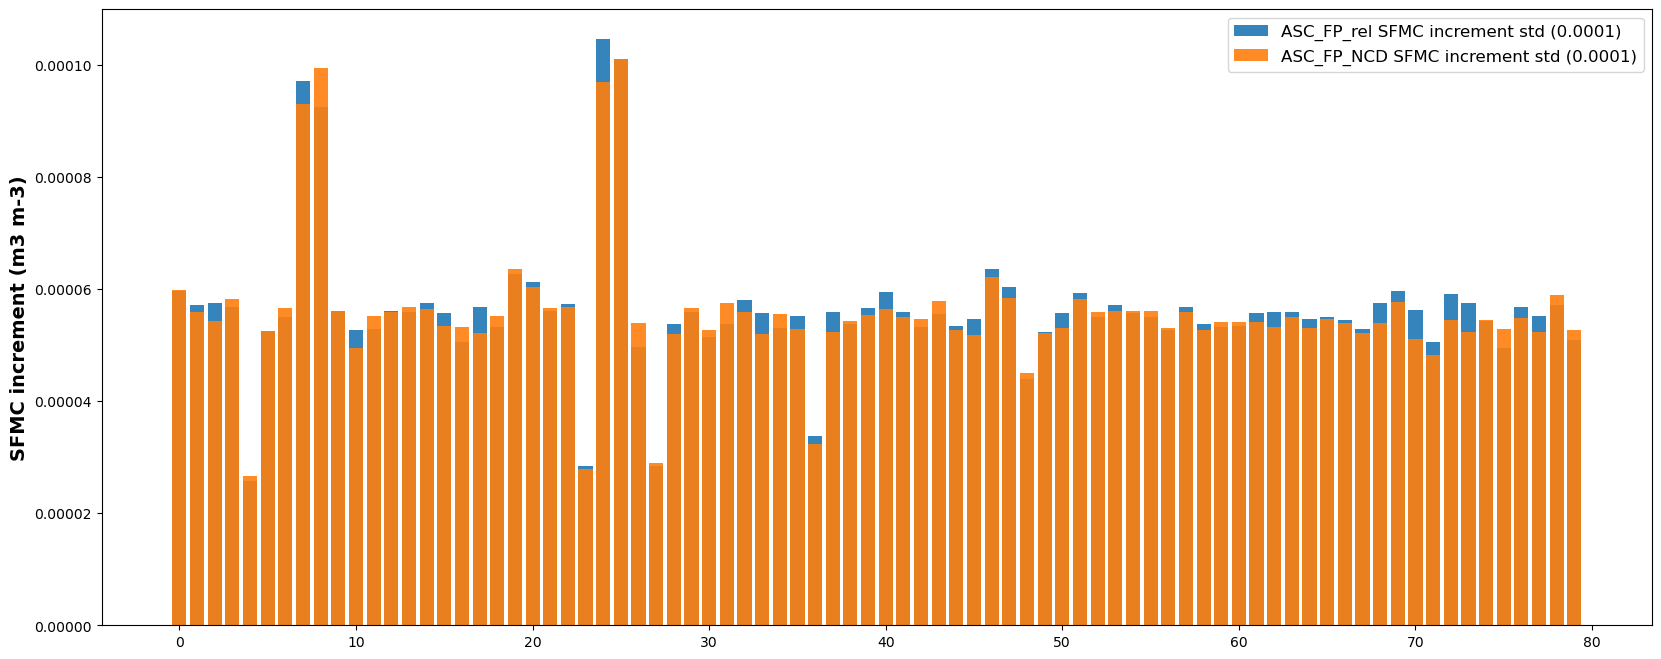

In [ ]:

print(len(ex1_ts_std_sfmc_increment))
print(len(ex2_ts_std_sfmc_increment))

index = np.arange(len(ex1_ts_mean_sfmc_increment))
number_of_days = (end_date - start_date).days
delta = number_of_days // len(index)
xticks = [start_date + timedelta(days=i*delta) for i in range(len(index))]

plt.figure(figsize=(20,8))
plt.bar(index, ex1_ts_std_sfmc_increment, alpha=opacity, label=f'{ex1_label} SFMC increment std ({np.nanmean(ex1_ts_std_sfmc_increment):.4f})')
plt.bar(index, ex2_ts_std_sfmc_increment, alpha=opacity, label=f'{ex2_label} SFMC increment std ({np.nanmean(ex2_ts_std_sfmc_increment):.4f})')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0
plt.ylabel('SFMC increment (m3 m-3)', weight='bold', fontsize=14)

# Using start_date and end_date, set the x-axis tick labels to show the first day of each year
# Make datetime object the length of index using the start_date and end_date to calculate the number of days


# Legend
plt.legend(fontsize=12)
plt.savefig('SFMC_increment_std_ts.png', bbox_inches='tight')
plt.show()

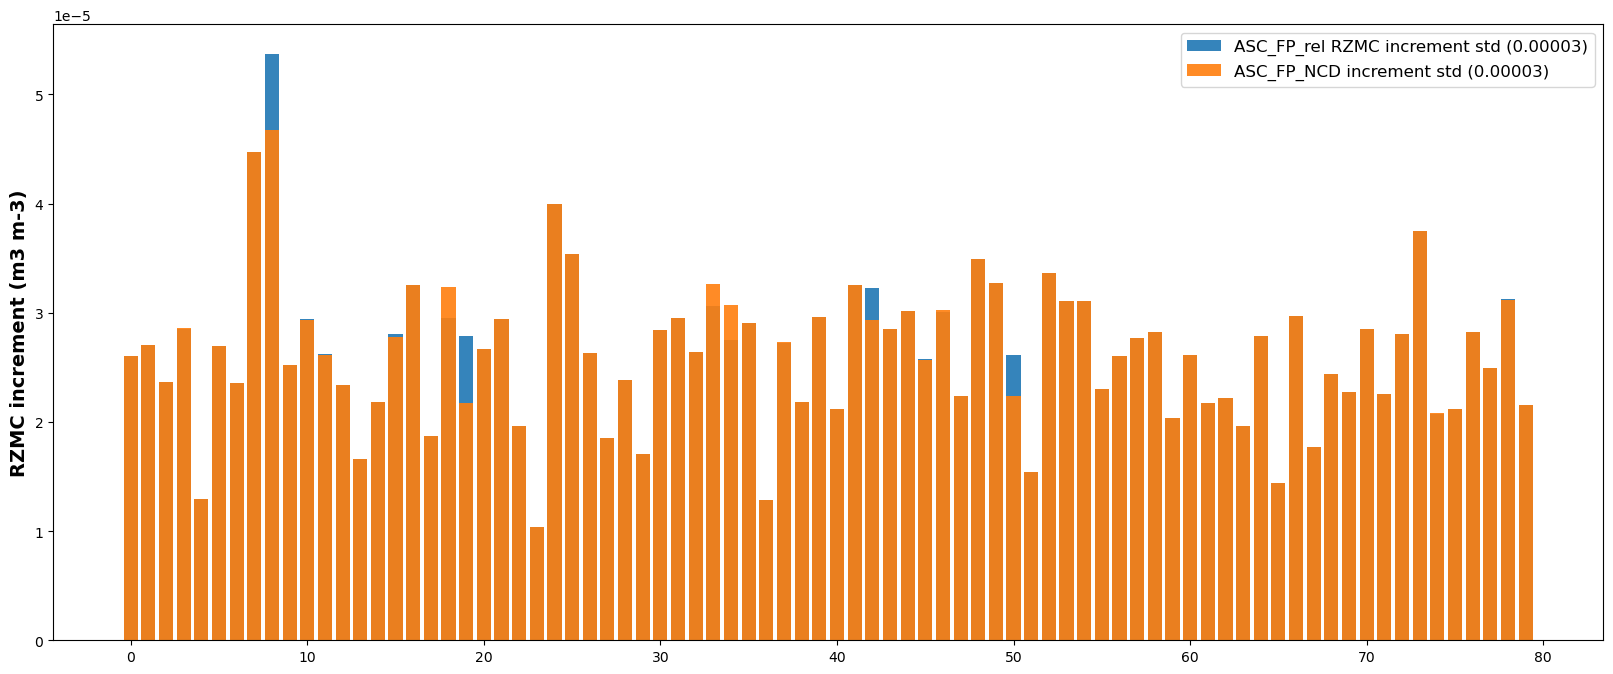

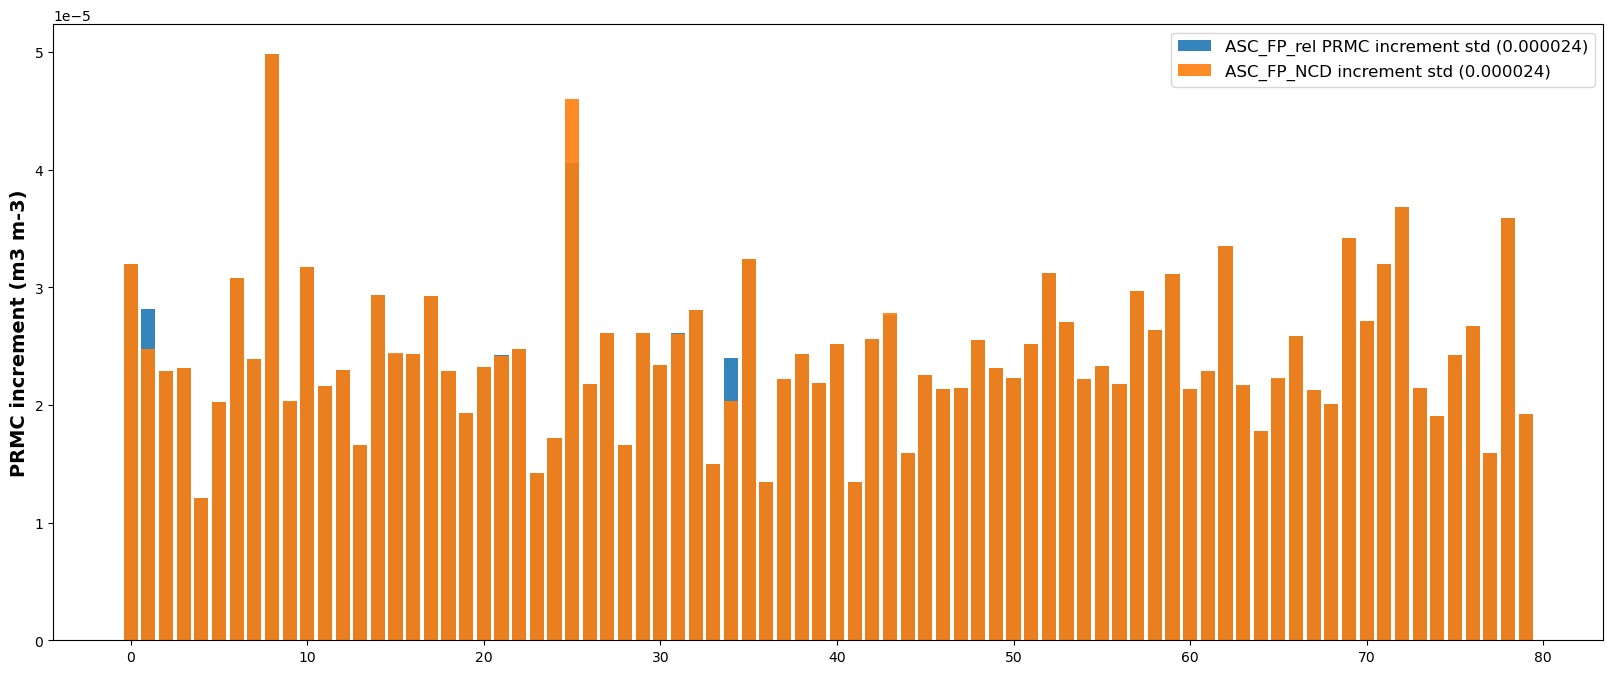

In [ ]:

plt.figure(figsize=(20,8))
plt.bar(index, ex1_ts_std_rzmc_increment, alpha=opacity, label=f'{ex1_label} RZMC increment std ({np.nanmean(ex1_ts_std_rzmc_increment):.5f})')
plt.bar(index, ex2_ts_std_rzmc_increment, alpha=opacity, label=f'{ex2_label} increment std ({np.nanmean(ex2_ts_std_rzmc_increment):.5f})')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0
plt.ylabel('RZMC increment (m3 m-3)', weight='bold', fontsize=14)
# Legend
plt.legend(fontsize=12)
plt.savefig('RZMC_increment_std_ts.png', bbox_inches='tight')

plt.figure(figsize=(20,8))
plt.bar(index, ex1_ts_std_prmc_increment, alpha=opacity, label=f'{ex1_label} PRMC increment std ({np.nanmean(ex1_ts_std_prmc_increment):.6f})')
plt.bar(index, ex2_ts_std_prmc_increment, alpha=opacity, label=f'{ex2_label} increment std ({np.nanmean(ex2_ts_std_prmc_increment):.6f})')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0
plt.ylabel('PRMC increment (m3 m-3)', weight='bold', fontsize=14)
# Legend
plt.legend(fontsize=12)
plt.savefig('PRMC_increment_std_ts.png', bbox_inches='tight')

In [ ]:
print(np.max(ex2_std_sfmc_increment - ex1_std_sfmc_increment))
print(np.max(ex2_std_rzmc_increment - ex1_std_rzmc_increment))
print(np.max(ex2_std_prmc_increment - ex1_std_prmc_increment))

bang bang

SyntaxError: invalid syntax (3895291986.py, line 5)

 Saving figure as ASC_FP minus CTRL_FP: Surface Soil Moisture Skill (Δ anomaly R).png 



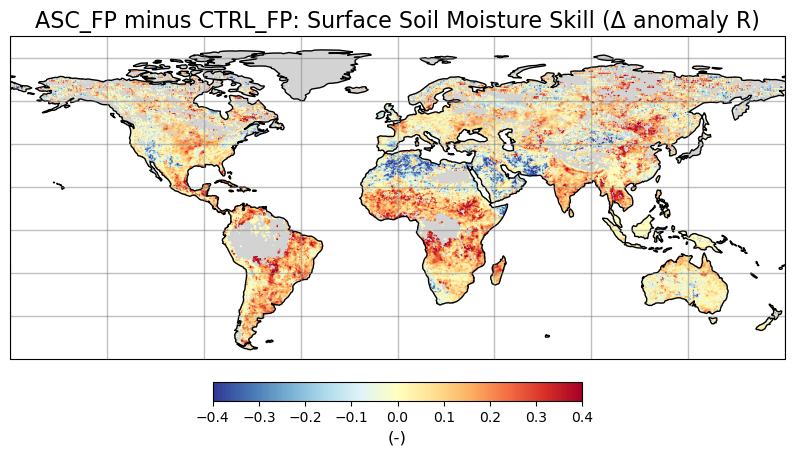

Mean:0.06254884339896168


In [ ]:
# Open .mat files

data = sio.loadmat('../test_data/AMS_24/IVs/Rdiff_DAv7ASCt2_M36_FPprcp_minus_OLv7_M36_FPprcp.mat')

# Get the data from the .mat file which contains 3 variables, Rdiff_vector, lons, lats
Rdiff_vector = np.squeeze(data['Rdiff_vector'])
lons = np.squeeze(data['lons'])
lats = np.squeeze(data['lats'])

ob_array = np.empty([len(Rdiff_vector),3])
ob_array[:,1] = lons
ob_array[:,2] = lats
ob_array[:,0] = Rdiff_vector

# Plot the data
plot_global_tight(ob_array,True,'ASC_FP minus CTRL_FP: Surface Soil Moisture Skill (Δ anomaly R)','(-)', -0.4, 0.4)

print("Mean:" + str(np.nanmean(Rdiff_vector)))

 Saving figure as CTRL_IM minus CTRL_FP: Surface Soil Moisture Skill (Δ anomaly R).png 



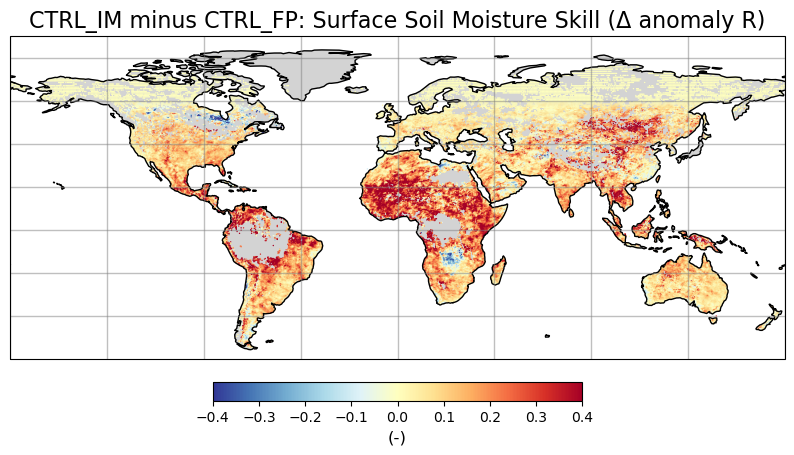

Mean:0.12248152989957214


In [ ]:
# Open .mat files

data = sio.loadmat('../test_data/AMS_24/IVs/Rdiff_OLv7_M36_minus_OLv7_M36_FPprcp.mat')

# Get the data from the .mat file which contains 3 variables, Rdiff_vector, lons, lats
Rdiff_vector = np.squeeze(data['Rdiff_vector'])
lons = np.squeeze(data['lons'])
lats = np.squeeze(data['lats'])

ob_array = np.empty([len(Rdiff_vector),3])
ob_array[:,1] = lons
ob_array[:,2] = lats
ob_array[:,0] = Rdiff_vector

# Plot the data
plot_global_tight(ob_array,True,'CTRL_IM minus CTRL_FP: Surface Soil Moisture Skill (Δ anomaly R)','(-)', -0.4, 0.4)

print("Mean:" + str(np.nanmean(Rdiff_vector)))

['unique_tilenum', 'num_obs', 'mean_obs_obs', 'mean_obs_fcst', 'mean_obs_ana', 'mean_obs_minus_fcst', 'mean_obs_minus_ana', 'std_obs_minus_fcst', 'std_obs_minus_ana', 'lon_tilenum', 'lat_tilenum']
 Saving figure as ASC_IM: Number of ASCAT Obs Assimilated.png 



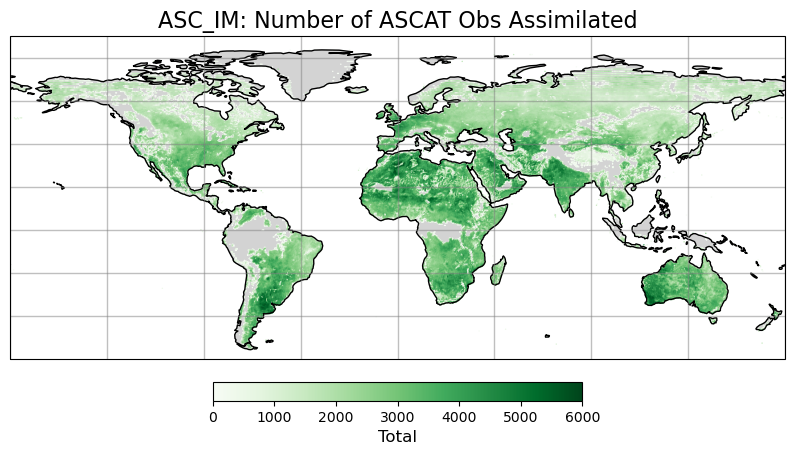

 Saving figure as ASC_IM: StdDev of OmF (SFDS).png 



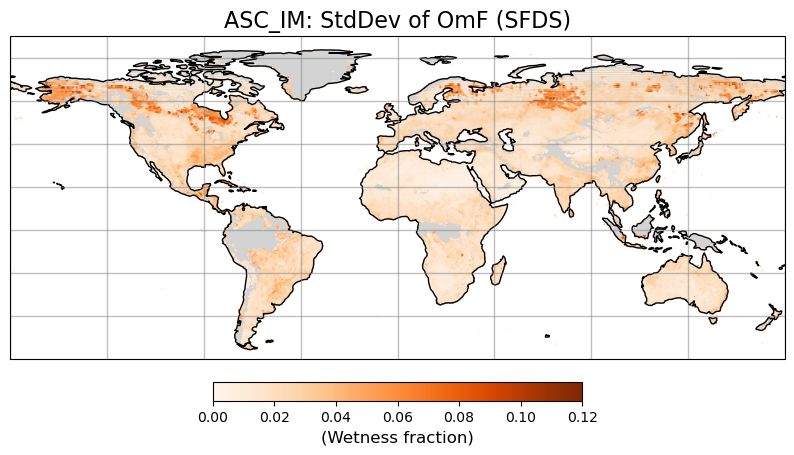

In [ ]:
# Load the calculated values from the file
data = np.load('../test_data/AMS_24/DAv7_M36_ASCAT_type_2_obsfcstana_stats.npz', allow_pickle=True)

# list the variables in the file
print(data.files)

unique_tilenum = data['unique_tilenum']
num_unique_tilenum = len(unique_tilenum)
lon_tilenum = data['lon_tilenum']
lat_tilenum = data['lat_tilenum']
num_obs = data['num_obs']
std_obs_minus_fcst = data['std_obs_minus_fcst']
std_obs_minus_ana = data['std_obs_minus_ana']


obarray = np.empty([num_unique_tilenum, 3])
obarray[:, 1] = lon_tilenum
obarray[:, 2] = lat_tilenum

obarray[:, 0] = num_obs    
plot_global_tight(obarray,True,'ASC_IM: Number of ASCAT Obs Assimilated','Total', 0, 6000, cmap='Greens')

obarray[:, 0] = std_obs_minus_fcst    
plot_global_tight(obarray,True,'ASC_IM: StdDev of OmF (SFDS)','(Wetness fraction)', 0, 0.12, cmap='Oranges')

 Saving figure as ASCAT_IM minus ASCAT_FP: Difference in StdDev of OmF (SFDS).png 



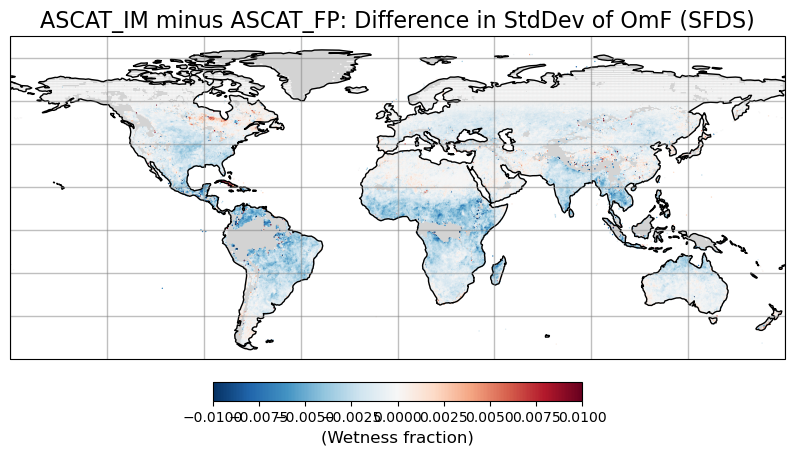

In [ ]:

# Find the corresponding values in unique_tilenum_fp and their indices
mask = np.isin(unique_tilenum_fp, unique_tilenum)
corresponding_values = unique_tilenum_fp[mask]
corresponding_indices_fp = np.where(mask)[0]

# Find the corresponding values in unique_tilenum and their indices
corresponding_indices = np.where(np.isin(unique_tilenum, corresponding_values))[0]

# Subtract the values
std_obs_minus_fcst_diff = std_obs_minus_fcst[corresponding_indices] - std_obs_minus_fcst_fp[corresponding_indices_fp] 


obarray = np.empty([len(corresponding_indices), 3])

obarray[:, 1] = lon_tilenum[corresponding_indices]
obarray[:, 2] = lat_tilenum[corresponding_indices]

obarray[:, 0] = std_obs_minus_fcst_diff
plot_global_tight(obarray,True,'ASCAT_IM minus ASCAT_FP: Difference in StdDev of OmF (SFDS)','(Wetness fraction)', -0.01, 0.01, cmap='RdBu_r')


 Saving figure as ASC_IM: StdDev of surface SM increment.png 



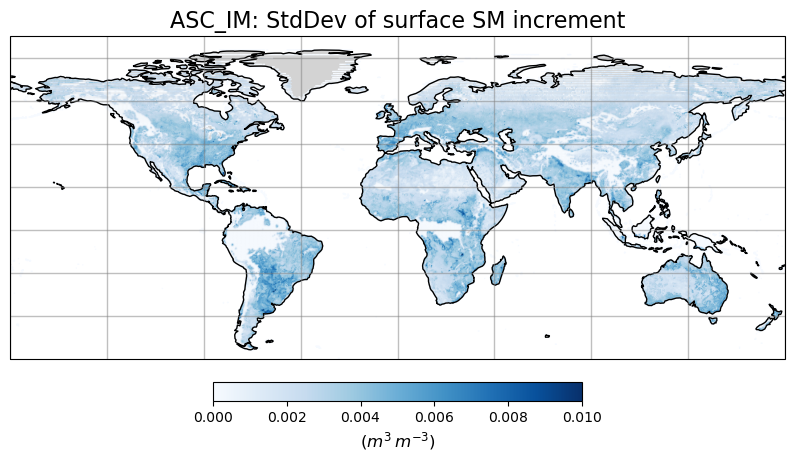

In [ ]:
ds = xr.open_dataset('DAv7_M36.inst3_1d_lndfcstana_Nt.20150901.nc4')

lon = ds['lon']
lat = ds['lat']

n_tile = len(lat)

# Load the calculated values from the file
data = np.load('../test_data/AMS_24/DAv7_M36_ASCAT_type_2_increment_stats.npz' , allow_pickle=True)

std_sfmc_increment = data['std_sfmc_increment']
std_rzmc_increment = data['std_rzmc_increment']

obarray = np.empty([n_tile, 3])
obarray[:, 1] = lon
obarray[:, 2] = lat
obarray[:, 0] = std_sfmc_increment
    
plot_global_tight(obarray,True,'ASC_IM: StdDev of surface SM increment','($m^3 \, m^{-3}$)', 0, 0.01, cmap='Blues')

std_sfmc_increment_a = std_sfmc_increment

 Saving figure as ASCAT_IM minus ASCAT_FP: Difference in StdDev surface SM increment.png 



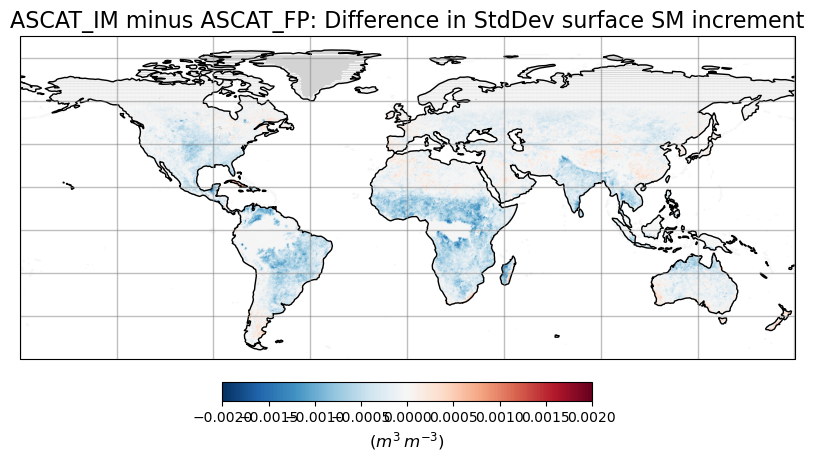

In [ ]:
# Subtract the values
obarray[:, 0] = std_sfmc_increment - std_sfmc_increment_fp
plot_global_tight(obarray,True,'ASCAT_IM minus ASCAT_FP: Difference in StdDev surface SM increment','($m^3 \, m^{-3}$)', -0.002, 0.002, cmap='RdBu_r')

 Saving figure as ASCAT_IM minus CTRL_IM: Surface Soil Moisture Skill (Δ anomaly R).png 



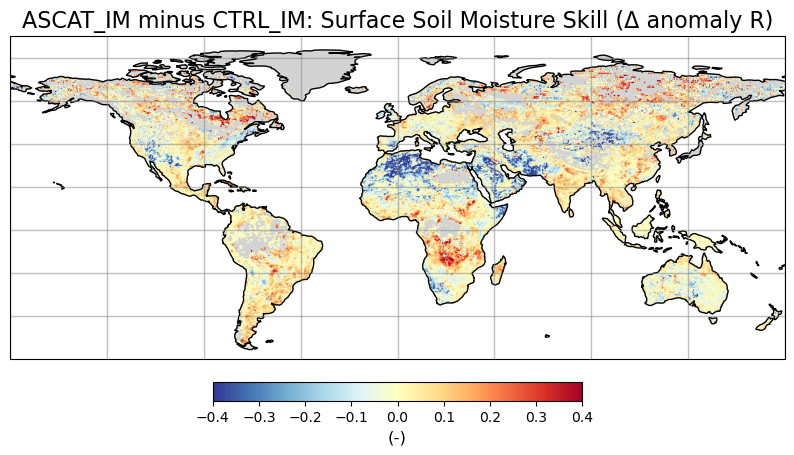

 Saving figure as |ASCAT_IM minus CTRL_IM| - |ASCAT_FP minus CTRL_FP|: Surface Soil Moisture Skill (Δ anomaly R).png 



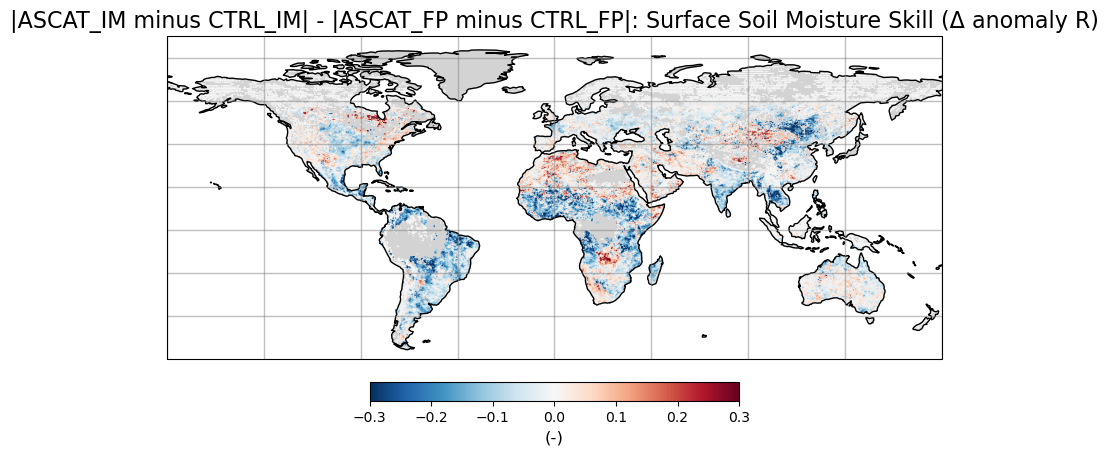

In [ ]:
# Open .mat files

data = sio.loadmat('../test_data/AMS_24/IVs/Rdiff_DAv7ASCt2_M36_minus_OLv7_M36.mat')

# Get the data from the .mat file which contains 3 variables, Rdiff_vector, lons, lats
Rdiff_vector = np.squeeze(data['Rdiff_vector'])
lons = np.squeeze(data['lons'])
lats = np.squeeze(data['lats'])

ob_array = np.empty([len(Rdiff_vector),3])
ob_array[:,1] = lons
ob_array[:,2] = lats
ob_array[:,0] = Rdiff_vector

# Plot the data
plot_global_tight(ob_array,True,'ASCAT_IM minus CTRL_IM: Surface Soil Moisture Skill (Δ anomaly R)','(-)', -0.4, 0.4)

data = sio.loadmat('../test_data/AMS_24/IVs/Rdiff_DAv7ASCt2_M36_FPprcp_minus_OLv7_M36_FPprcp.mat')

# Get the data from the .mat file which contains 3 variables, Rdiff_vector, lons, lats
Rdiff_vector_fp = np.squeeze(data['Rdiff_vector'])

# Subtract the values
Rdiff_vector_diff = np.abs(Rdiff_vector) - np.abs(Rdiff_vector_fp)
ob_array[:,0] = Rdiff_vector_diff

# Plot the data
plot_global_tight(ob_array,True,'|ASCAT_IM minus CTRL_IM| - |ASCAT_FP minus CTRL_FP|: Surface Soil Moisture Skill (Δ anomaly R)','(-)', -0.3, 0.3, cmap='RdBu_r')

['unique_tilenum', 'num_obs_smap', 'num_obs_ascat', 'mean_obs_smap', 'mean_obs_ascat', 'mean_fcst_smap', 'mean_fcst_ascat', 'mean_ana_smap', 'mean_ana_ascat', 'mean_obs_minus_fcst_smap', 'mean_obs_minus_fcst_ascat', 'mean_obs_minus_ana_smap', 'mean_obs_minus_ana_ascat', 'std_obs_minus_fcst_smap', 'std_obs_minus_fcst_ascat', 'std_obs_minus_ana_smap', 'std_obs_minus_ana_ascat', 'lon_tilenum', 'lat_tilenum']
 Saving figure as SMPASC_IM: StdDev of OmF (Tb).png 



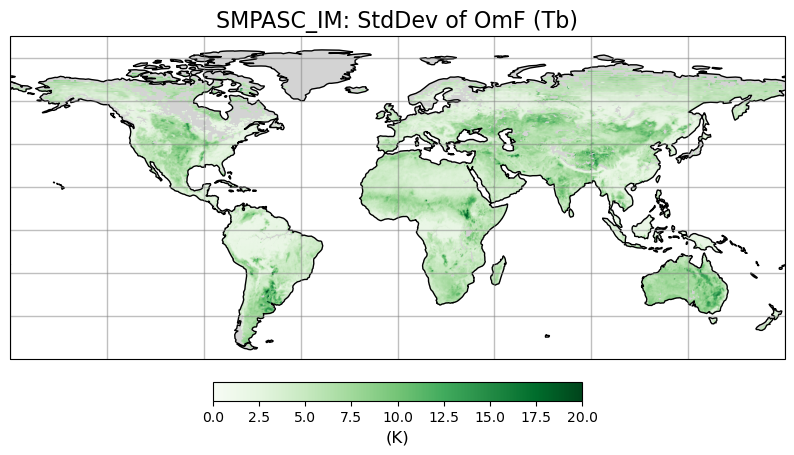

 Saving figure as SMPASC_IM: StdDev of OmF (SFDS).png 



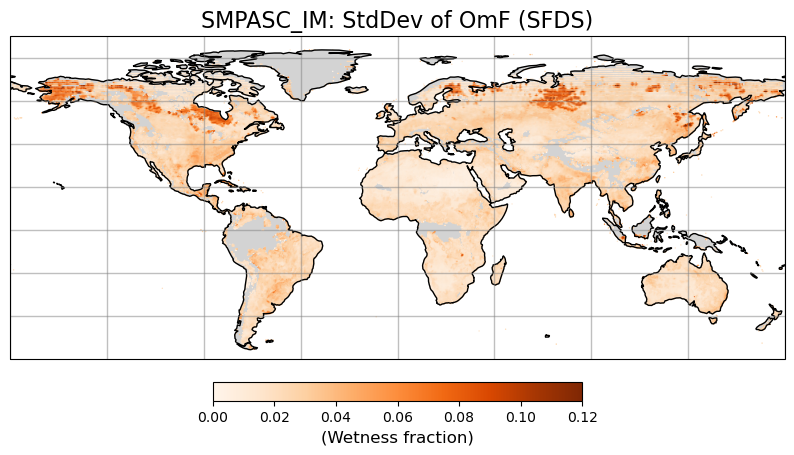

In [ ]:
# Load the calculated values from the file
data2 = np.load('../test_data/AMS_24/smap_ascat_multivariate_test_obsfcstana_stats.npz', allow_pickle=True)

# list the variables in the file
print(data2.files)

unique_tilenum2 = data2['unique_tilenum']
num_unique_tilenum2 = len(unique_tilenum2)
lon_tilenum2 = data2['lon_tilenum']
lat_tilenum2 = data2['lat_tilenum']
num_obs2 = data2['num_obs_smap']
std_obs_minus_fcst_smap2 = data2['std_obs_minus_fcst_smap']
std_obs_minus_fcst_ascat2 = data2['std_obs_minus_fcst_ascat']

obarray2 = np.empty([num_unique_tilenum2, 3])
obarray2[:, 1] = lon_tilenum2
obarray2[:, 2] = lat_tilenum2

obarray2[:, 0] = std_obs_minus_fcst_smap2    
plot_global_tight(obarray2,True,'SMPASC_IM: StdDev of OmF (Tb)','(K)', 0, 20, cmap='Greens')

obarray2[:, 0] = std_obs_minus_fcst_ascat2    
plot_global_tight(obarray2,True,'SMPASC_IM: StdDev of OmF (SFDS)','(Wetness fraction)', 0, 0.12, cmap='Oranges')

 Saving figure as SMPASC_IM minus SMP_IM: Difference in StdDev of OmF (Tb).png 



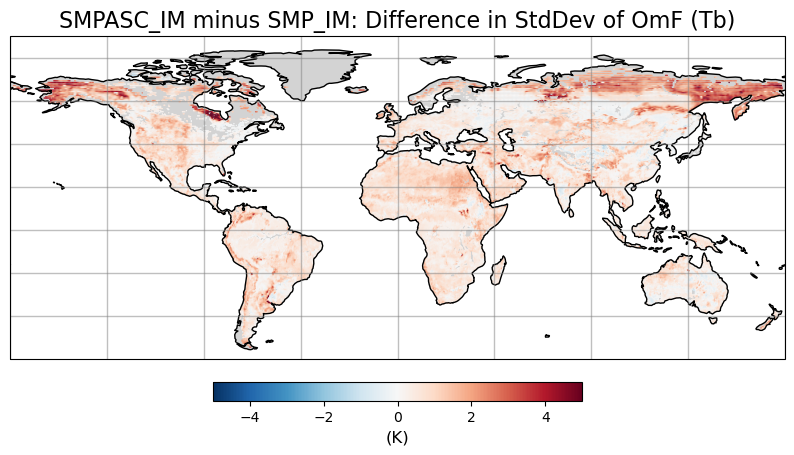

In [ ]:
# Load the calculated values from the SMAP file
data = np.load('../test_data/AMS_24/DAv7_M36_obsfcstana_stats.npz', allow_pickle=True)

unique_tilenum = data['unique_tilenum']
num_unique_tilenum = len(unique_tilenum)
lon_tilenum = data['lon_tilenum']
lat_tilenum = data['lat_tilenum']
num_obs = data['num_obs']
std_obs_minus_fcst = data['std_obs_minus_fcst']

obarray = np.empty([num_unique_tilenum, 3])
obarray[:, 1] = lon_tilenum
obarray[:, 2] = lat_tilenum

# Subtract std_obs_minus_fcst2 from std_obs_minus_fcst using the unique_tilenum and unique_tilenum2 as the index

# Find the indices of the unique_tilenum2 in unique_tilenum
index = np.empty(num_unique_tilenum, dtype=int)
for i in range(num_unique_tilenum):
    index[i] = np.where(unique_tilenum2 == unique_tilenum[i])[0][0]

# Subtract the values
std_obs_minus_fcst_diff = std_obs_minus_fcst_smap2[index] - std_obs_minus_fcst

obarray[:, 0] = std_obs_minus_fcst_diff
plot_global_tight(obarray,True,'SMPASC_IM minus SMP_IM: Difference in StdDev of OmF (Tb)','(K)', -5, 5, cmap='RdBu_r')

 Saving figure as SMPASC_IM minus ASC_IM: Difference in StdDev of OmF (SFDS).png 



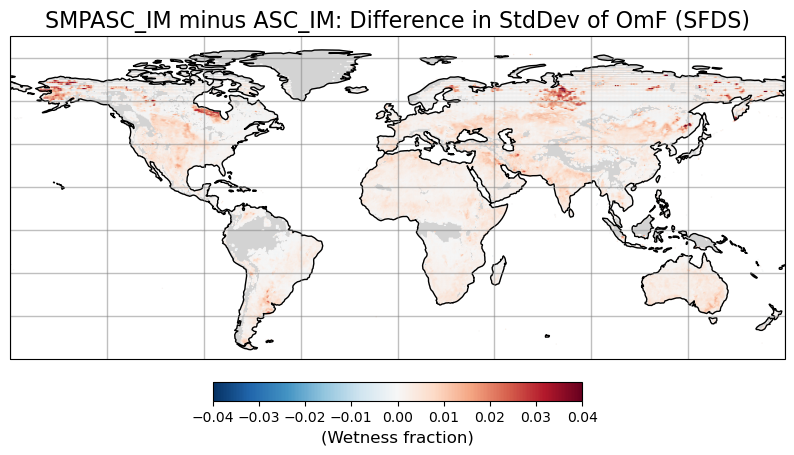

In [ ]:
# Load the calculated values from the SMAP file
data = np.load('../test_data/AMS_24/DAv7_M36_ASCAT_type_2_obsfcstana_stats.npz', allow_pickle=True)

unique_tilenum = data['unique_tilenum']
num_unique_tilenum = len(unique_tilenum)
lon_tilenum = data['lon_tilenum']
lat_tilenum = data['lat_tilenum']
num_obs = data['num_obs']
std_obs_minus_fcst = data['std_obs_minus_fcst']

obarray = np.empty([num_unique_tilenum, 3])
obarray[:, 1] = lon_tilenum
obarray[:, 2] = lat_tilenum

# Subtract std_obs_minus_fcst2 from std_obs_minus_fcst using the unique_tilenum and unique_tilenum2 as the index

# Find the indices of the unique_tilenum2 in unique_tilenum
index = np.empty(num_unique_tilenum, dtype=int)
for i in range(num_unique_tilenum):
    index[i] = np.where(unique_tilenum2 == unique_tilenum[i])[0][0]

# Subtract the values
std_obs_minus_fcst_diff = std_obs_minus_fcst_ascat2[index] - std_obs_minus_fcst


obarray[:, 0] = std_obs_minus_fcst_diff
plot_global_tight(obarray,True,'SMPASC_IM minus ASC_IM: Difference in StdDev of OmF (SFDS)','(Wetness fraction)', -0.04, 0.04, cmap='RdBu_r')

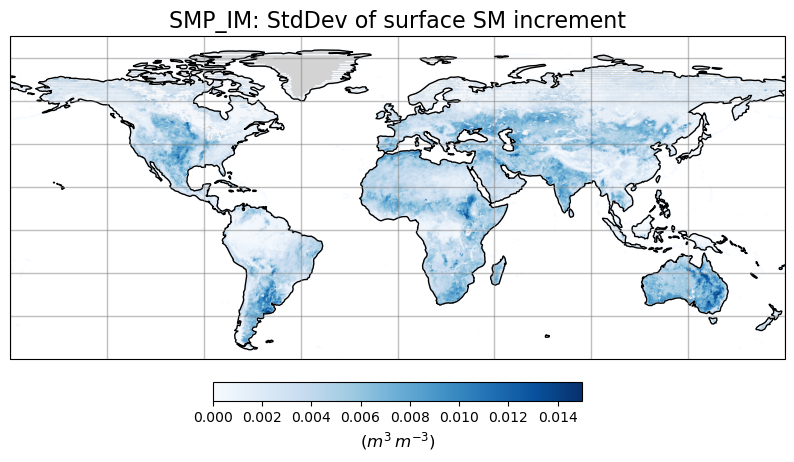

In [ ]:
# Load the calculated values from the file
data = np.load('../test_data/AMS_24/DAv7_M36_increment_stats.npz', allow_pickle=True)

std_sfmc_increment = data['std_sfmc_increment']

obarray = np.empty([n_tile, 3])
obarray[:, 1] = lon
obarray[:, 2] = lat
obarray[:, 0] = std_sfmc_increment
    
plot_global_tight(obarray,False,'SMP_IM: StdDev of surface SM increment','($m^3 \, m^{-3}$)', 0, 0.015, cmap='Blues')

std_sfmc_increment_s = std_sfmc_increment

 Saving figure as SMPASC_IM: StdDev of surface SM increment.png 



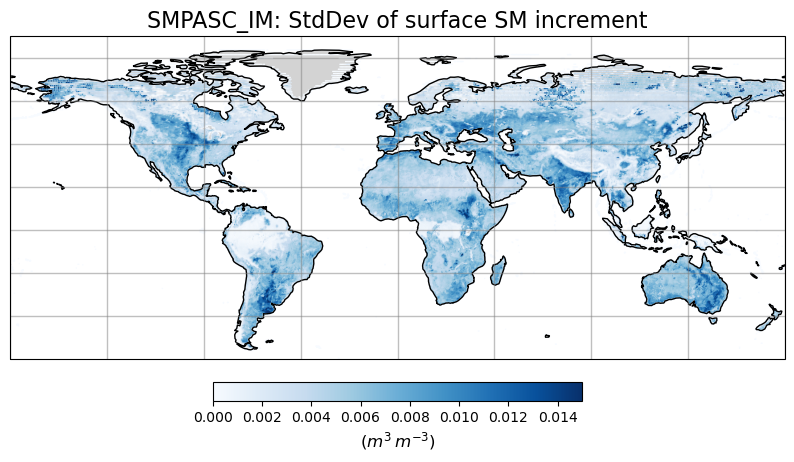

In [ ]:
# Load the calculated values from the file
data = np.load('../test_data/AMS_24/smap_ascat_multivariate_test_increment_stats.npz', allow_pickle=True)

std_sfmc_increment = data['std_sfmc_increment']

obarray = np.empty([n_tile, 3])
obarray[:, 1] = lon
obarray[:, 2] = lat
obarray[:, 0] = std_sfmc_increment
    
plot_global_tight(obarray,True,'SMPASC_IM: StdDev of surface SM increment','($m^3 \, m^{-3}$)', 0, 0.015, cmap='Blues')

std_sfmc_increment_sa = std_sfmc_increment


 Saving figure as SMPASC_IM minus SMP_IM: StdDev of surface SM increment.png 



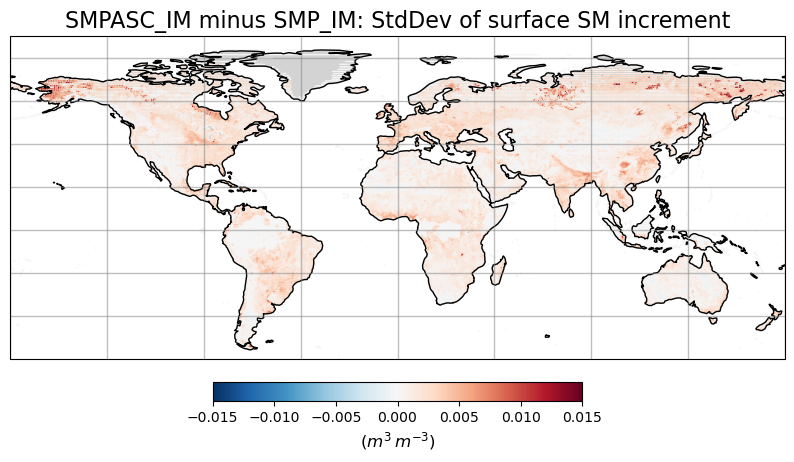

 Saving figure as SMPASC_IM minus ASC_IM: StdDev of surface SM increment.png 



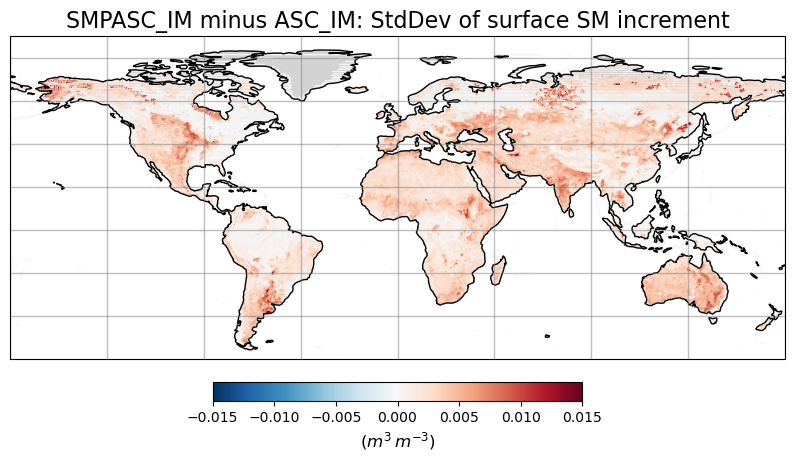

In [ ]:
obarray[:, 0] = std_sfmc_increment_sa - std_sfmc_increment_s
    
plot_global_tight(obarray,True,'SMPASC_IM minus SMP_IM: StdDev of surface SM increment','($m^3 \, m^{-3}$)', -0.015, 0.015, cmap='RdBu_r')

obarray[:, 0] = std_sfmc_increment_sa - std_sfmc_increment_a
    
plot_global_tight(obarray,True,'SMPASC_IM minus ASC_IM: StdDev of surface SM increment','($m^3 \, m^{-3}$)', -0.015, 0.015, cmap='RdBu_r')